## 2.1.1 基本操作

In [ ]:
import torch

### 张量的创建

   1. arange(n) 函数类似python原来的 range(n)，创建一个张量，其元素是从0到n-1的整数，其形状为(1, n)
   2. zeros((a1, a2, a3, ...)) 创建一个元素全为0的张量，其形状为(a1, a2, a3, ...)
   3. ones((a1, a2, a3, ...)) 创建一个元素全为1的张量，其形状为(a1, a2, a3, ...)
   4. rand((a1, a2, a3, ...)) 创建一个元素随机的张量，取值范围为[0, 1)，其形状为(a1, a2, a3, ...)
   5. randn((a1, a2, a3, ...)) 创建一个元素均值为0，方差为1的正态分布张量，其形状为(a1, a2, a3, ...)
   6. tensor(arr) 通过python的列表类型，创建一个张量

In [ ]:
x = torch.arange(12)
y = torch.zeros((3, 4))
z = torch.ones((2, 3, 4))
w = torch.rand((2, 3, 4))
v = torch.randn((2, 3, 4))
u = torch.tensor([[1, 2, 3], [4, 5, 6]])

In [ ]:
print("x =", x)
print("y =", y)
print("z =", z)
print("w =", w)
print("v =", v)
print("u =", u)

### 张量的操作

   1. shape 函数返回张量的形状
   2. size() 函数返回张量的形状
   3. reshape(a1, a2, a3, ...) 函数返回一个新的张量，其形状为指定的形状，形状为(a1, a2, a3, ...)
   4. sum() 对张量中的所有元素进行求和，会产生一个单元素张量
   5. numpy() 将张量转化为NumPy张量
   6. item() 将张量转化为python的数字 或者 python原本的float(x) int(x)也可以转化为python的数字

In [ ]:
print("x.shape =", x.shape)
print("x.size() =", x.size())
print("x.reshape(2, 6) =", x.reshape(2, 6))
print("x.sum() =", x.sum())


## 2.1.2 运算符

### 按元素计算
1. \+ 按元素求和
2. \- 按元素求差
3. \* 按元素求积
4. \/ 按元素求商
5. ** 按元素求幂
6. \% 按元素求余
7. exp() 按元素求e的指数
8. == 按元素判断是否相等

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y, x % y, torch.exp(x), x == y

### 张量的连结
1. torch.cat((X, Y), dim = 0) 将X和Y连结在一起，维度为0，即按行连结, 需要除了第0维度的其他形状相同
2. torch.cat((X, Y), dim = 1) 将X和Y连结在一起，维度为1，即按列连结, 需要除了第1维度的其他形状相同

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

### 2.1.3 广播机制
当两个张量的形状不同时，可以通过广播机制，将其中一个张量的形状转换成另一个张量的形状

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a + b

如上所示，a + b 实际上的求的是 [[0, 0], [1, 1], [2, 2]] 和 [[0, 1], [0, 1], [0, 1]]的和，他就是将张量a和b广播到对应的形状，能够广播的前提是a,b的形状在逻辑上可一通过复制扩充达到形状一致

### 2.1.4 索引和切片
torch的索引与python索引机制一致，这里记录一些常用操作
1. X[-1] 在第一维选择最后一个元素
2. X[1:3] 在第一维选择下标[1, 3)的连续元素
3. X[1:3, 2:4] 在第一维选择索引[1,3)的元素，在第二维选择索引为[2,4)的元素
4. X[1, 2, ...] = n 修改张量里具体位置的值

In [ ]:
X = torch.arange(20).reshape(4, 5)

In [ ]:
X, X[-1], X[1:3], X[1:3, 2:4], X[1, 2]

### 2.1.5 节省内存的操作
如果使用Y=X+Y这种运算方法的话，会导致额外的内存分配，通常使用Y[:]=X+Y 或 Y += X 来减少内存开销

In [ ]:
X = torch.arange(12).reshape(3, 4)
Y = torch.arange(12).reshape(3, 4)
Z = torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:] = X + Y
print('id(Z):',id(Z))

In [ ]:
Z = X + Y
print('id(Z):',id(Z))

In [ ]:
print('id(Y):', id(Y))
Y += X
print('id(Y):', id(Y))

## 2.2 数据预处理

### 读取数据集
首先创建一个人工数据集

In [ ]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  #列名
    f.write('NA,Pave,127500\n')  #每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

通过pandas 来读取csv文件

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

处理缺省值，将平均值复制到NaN的元素中

In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

将Alley中的NaN 转化为两个标签，Alley_Pave, Alley_nan

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

再将input转化为张量的格式

In [ ]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

## 2.3 线性代数

### 标量

In [1]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x ** y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 向量

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [3]:
x[3]

tensor(3)

In [4]:
len(x)

4

In [5]:
x.shape

torch.Size([4])

### 矩阵

In [6]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

转置运算, 如果转置与原矩阵相同，则称为对称矩阵

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

### 张量

In [8]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量的运算的本质

In [9]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  #通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

矩阵按元素相乘（Hadamard积）

In [10]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [11]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 降维
1. sum(axis = n) 对张量的第n维求和
2. sum(axis = [d1, d2, ...]) 对张量的第d1, d2, ...维求和
3. mean(axis = n) 对张量的第n维元素求平均值
4. mean(axis = [d1, d2, ...]) 对张量的第d1, d2, ...维元素求平均值
5. A.sum()/A.numel() 求平均的另一种手段

In [32]:
A = torch.arange(24, dtype=torch.float32).resize(2, 3, 4)
A, A.sum(axis=[0, 2])

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]),
 tensor([ 60.,  92., 124.]))

In [37]:
A.mean(axis=[0, 2])

tensor([ 7.5000, 11.5000, 15.5000])

### 非降维求和
1. A.sum(axis=1, keepdims=True)
2. A.cumsum(axis=n) 按某个轴累计求和

In [52]:
A, A.sum(axis=1, keepdims=True), A / A.sum(axis=1, keepdims=True)

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]),
 tensor([[[12., 15., 18., 21.]],
 
         [[48., 51., 54., 57.]]]),
 tensor([[[0.0000, 0.0667, 0.1111, 0.1429],
          [0.3333, 0.3333, 0.3333, 0.3333],
          [0.6667, 0.6000, 0.5556, 0.5238]],
 
         [[0.2500, 0.2549, 0.2593, 0.2632],
          [0.3333, 0.3333, 0.3333, 0.3333],
          [0.4167, 0.4118, 0.4074, 0.4035]]]))

In [60]:
A, A.cumsum(axis=0)

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]),
 tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 14., 16., 18.],
          [20., 22., 24., 26.],
          [28., 30., 32., 34.]]]))

### 张量的数学运算

向量-向量 点积

In [66]:
x = torch.arange(4)
y = torch.arange(4)
x.dot(y)

tensor(14)

In [67]:
torch.sum(x*y)

tensor(14)

矩阵-向量积

In [73]:
A = torch.arange(20).reshape(5, 4)
x = torch.arange(4)
A, x, torch.mv(A, x)

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([0, 1, 2, 3]),
 tensor([ 14,  38,  62,  86, 110]))

矩阵-矩阵积

In [74]:
A = torch.arange(20).reshape(5, 4)
B = torch.arange(12).reshape(4, 3)
torch.mm(A, B)

tensor([[ 42,  48,  54],
        [114, 136, 158],
        [186, 224, 262],
        [258, 312, 366],
        [330, 400, 470]])

In [76]:
A = torch.arange(20).reshape(5, 4)
B = torch.arange(20).reshape(5, 4)
A * B

tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121],
        [144, 169, 196, 225],
        [256, 289, 324, 361]])

向量的l1范数 绝对值之和

In [80]:
x = torch.arange(5, dtype=torch.float32)
torch.abs(x).sum()

tensor(10.)

向量的l2范数 元素平方和的平方根

In [81]:
torch.norm(x)

tensor(5.4772)

矩阵的Frobenius范数

In [84]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
torch.norm(A)

tensor(49.6991)

## 2.4 微积分

手动求导，并绘制图形

In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from IPython import display

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [10]:
def numerical_diff(f, x, h=1e-4):
    return (f(x + h) - f(x - h)) / (2 * h)

In [13]:
h = 0.1
for i in range(5):
    print(f'h = {h:.5f}, numerical_diff = {numerical_diff(f, 1, h):.5f}')
    h *= 0.1

h = 0.10000, numerical_diff = 2.00000
h = 0.01000, numerical_diff = 2.00000
h = 0.00100, numerical_diff = 2.00000
h = 0.00010, numerical_diff = 2.00000
h = 0.00001, numerical_diff = 2.00000


In [20]:
def use_svg_display():
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


In [18]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None,
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    def has_one_axis(X):
        return hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__")

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y ,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

C:\Users\Ailurus\AppData\Local\Temp/ipykernel_19212/1478813556.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


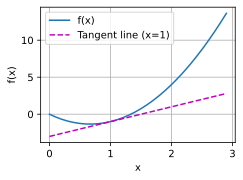

In [21]:
x = np.arange(0.0, 3.0, 0.1)
plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.5 自动微分

### 标量的反向传播

利用 torch 的内置函数计算梯度，eg: 求 $y = 2x^Tx$ 在 x = [0, 1, 2, 3] 的梯度

In [5]:
import torch

x = torch.arange(4.)

x.requires_grad_(True)
x.grad

In [8]:
x.grad.zero_()
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

在torch创建张量时，添加参数 requires_grad = True 则表明该张量需要求梯度
通过 y.backward() 这个反向传播函数，来计算出y关于x每一个分量的梯度

### 非标量变量的反向传播
当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

In [11]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 分离计算
有时，我们希望将某些计算移动到记录的计算图之外。例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。想象一下，我们想计算z关于x的梯度，但由于某种原因，我们希望将y视为一个常数，并且只考虑到x在y被计算后发挥的作用。

In [13]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad

tensor([0., 1., 4., 9.])

In [14]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [20]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a, a.grad, a.grad == d/a


(tensor(0.0824, requires_grad=True), tensor(16384.), tensor(True))

In [7]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
from matplotlib import pyplot as plt

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。笼统来说，可以把分布（distribution）看作是对事件的概率分配，稍后我们将给出的更正式定义。将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。输出是另一个相同⻓度的向量：它在索引i处的值是采样结果中i出现的次数。

In [3]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [4]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 2., 2., 1., 2.])

In [5]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1650, 0.1550, 0.1640, 0.1720, 0.1620, 0.1820])

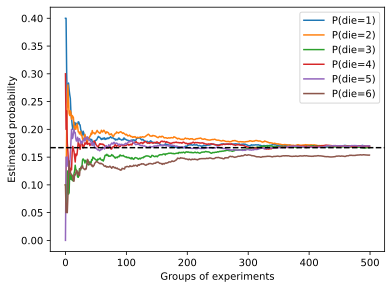

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)

plt.figure(figsize=(6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()